In [29]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
tweet_sentiment_df = pd.read_csv('all_days.csv')

In [31]:
tweet_cols = tweet_sentiment_df.columns
start_date = tweet_cols[1]
end_date = tweet_cols[-1]
# get date range
print(start_date,end_date)

2009-04-06 2009-06-25


In [42]:
# the are main etfs
#"SPDR", S&P 500 ETF 
#"SPY", iShares Core S&P 500 ETF 
#"IVV", Vanguard Total Stock Market ETF 
#"VTI", Vanguard S&P 500 ETF 
#"VOO", PowerShares QQQ 
#"QQQ", iShares Russell 2000 
#"IWM", SPDR Dow Jones Industrial Average 
main_etfs = ["SPY", "IVV", "VTI", "QQQ", "IWM", "DIA"]

# pandas_reader.data.DataReader to load the data. 
panel_data = data.DataReader(main_etfs, 'yahoo', start_date, end_date)
panel_data.head(10)

Attributes       High                                                         \
Symbols           DIA        IVV        IWM        QQQ        SPY        VTI   
Date                                                                           
2009-04-06  79.930000  84.010002  45.110001  32.330002  84.279999  41.830002   
2009-04-07  78.739998  82.849998  44.459999  31.920000  82.650002  41.250000   
2009-04-08  78.940002  83.150002  44.230000  32.150002  82.940002  41.340000   
2009-04-09  80.919998  86.010002  46.709999  33.009998  85.820000  42.869999   
2009-04-13  81.180000  86.760002  47.000000  33.070000  86.540001  43.240002   
2009-04-14  80.339996  85.980003  46.529999  32.880001  85.760002  42.860001   
2009-04-15  80.459999  85.639999  46.150002  32.430000  85.419998  42.639999   
2009-04-16  81.790001  87.360001  47.689999  33.430000  87.150002  43.599998   
2009-04-17  81.849998  87.870003  48.270000  33.500000  87.650002  43.869999   
2009-04-20  80.160004  85.889999  47.000000  32.820000  87.050003  43.090000   

Attributes        Low                                     ...          Volume  \
Symbols           DIA        IVV        IWM        QQQ    ...             IWM   
Date                                                      ...                   
2009-04-06  78.599998  82.510002  44.029999  31.650000    ...      63427300.0   
2009-04-07  77.690002  81.720001  43.119999  31.209999    ...      48410400.0   
2009-04-08  77.570000  81.760002  43.189999  31.490000    ...      60265100.0   
2009-04-09  79.760002  84.559998  45.099998  32.430000    ...      66699400.0   
2009-04-13  79.690002  84.800003  45.669998  32.529999    ...      58557300.0   
2009-04-14  79.080002  84.300003  45.230000  32.270000    ...      56579200.0   
2009-04-15  78.739998  83.800003  44.889999  31.850000    ...      48436100.0   
2009-04-16  79.709999  85.000000  45.759998  32.509998    ...      66307000.0   
2009-04-17  80.820000  86.360001  46.919998  32.930000    ...      51981400.0   
2009-04-20  78.349998  83.550003  45.200001  32.060001    ...      53370100.0   

Attributes                                       Adj Close             \
Symbols             QQQ          SPY        VTI        DIA        IVV   
Date                                                                    
2009-04-06  160413700.0  264866600.0  4136200.0  63.046455  68.702942   
2009-04-07  147531200.0  258947800.0  3986500.0  61.568275  67.103271   
2009-04-08  126126000.0  230402800.0  2255000.0  61.947720  67.841591   
2009-04-09  131871500.0  269653500.0  3068700.0  63.939629  70.548653   
2009-04-13  119310500.0  224847500.0  3069700.0  63.670876  70.630684   
2009-04-14  124069000.0  276598800.0  3185000.0  62.659081  69.375587   
2009-04-15  124808200.0  250726100.0  2905000.0  63.473251  70.122063   
2009-04-16  171168000.0  335202900.0  3199200.0  64.232101  71.180313   
2009-04-17  129835400.0  262649000.0  3490500.0  64.377792  71.598694   
2009-04-20  123080500.0  293690100.0  2939000.0  62.168762  68.653679   

Attributes                                              
Symbols           IWM        QQQ        SPY        VTI  
Date                                                    
2009-04-06  39.040184  29.190090  68.653137  34.446537  
2009-04-07  37.656166  28.421217  67.051788  33.570702  
2009-04-08  38.352528  28.900627  67.774445  34.041672  
2009-04-09  40.598316  29.796135  70.467995  35.421528  
2009-04-13  40.615738  29.750917  70.484428  35.471107  
2009-04-14  39.440613  29.389091  69.269058  34.810085  
2009-04-15  40.041218  29.307676  70.008102  35.181904  
2009-04-16  41.198936  30.067518  71.034660  35.785080  
2009-04-17  41.564533  30.130836  71.510963  36.024689  
2009-04-20  39.431900  29.162945  68.513550  34.496113  

[10 rows x 36 columns]

In [54]:
percent_change = 100*(panel_data['Close'] - panel_data['Open'])/panel_data['Open']

In [68]:
ax = percent_change.plot(kind='bar',figsize=(200,200),fontsize=100, title="percent change major indices per day")
ax.set_ylabel("percent change",size=100)
ax.legend(prop={'size': 100})

In [72]:
# moving averages for the closing price
# get average change per day
percent_change['mean'] = percent_change.mean(axis=1)

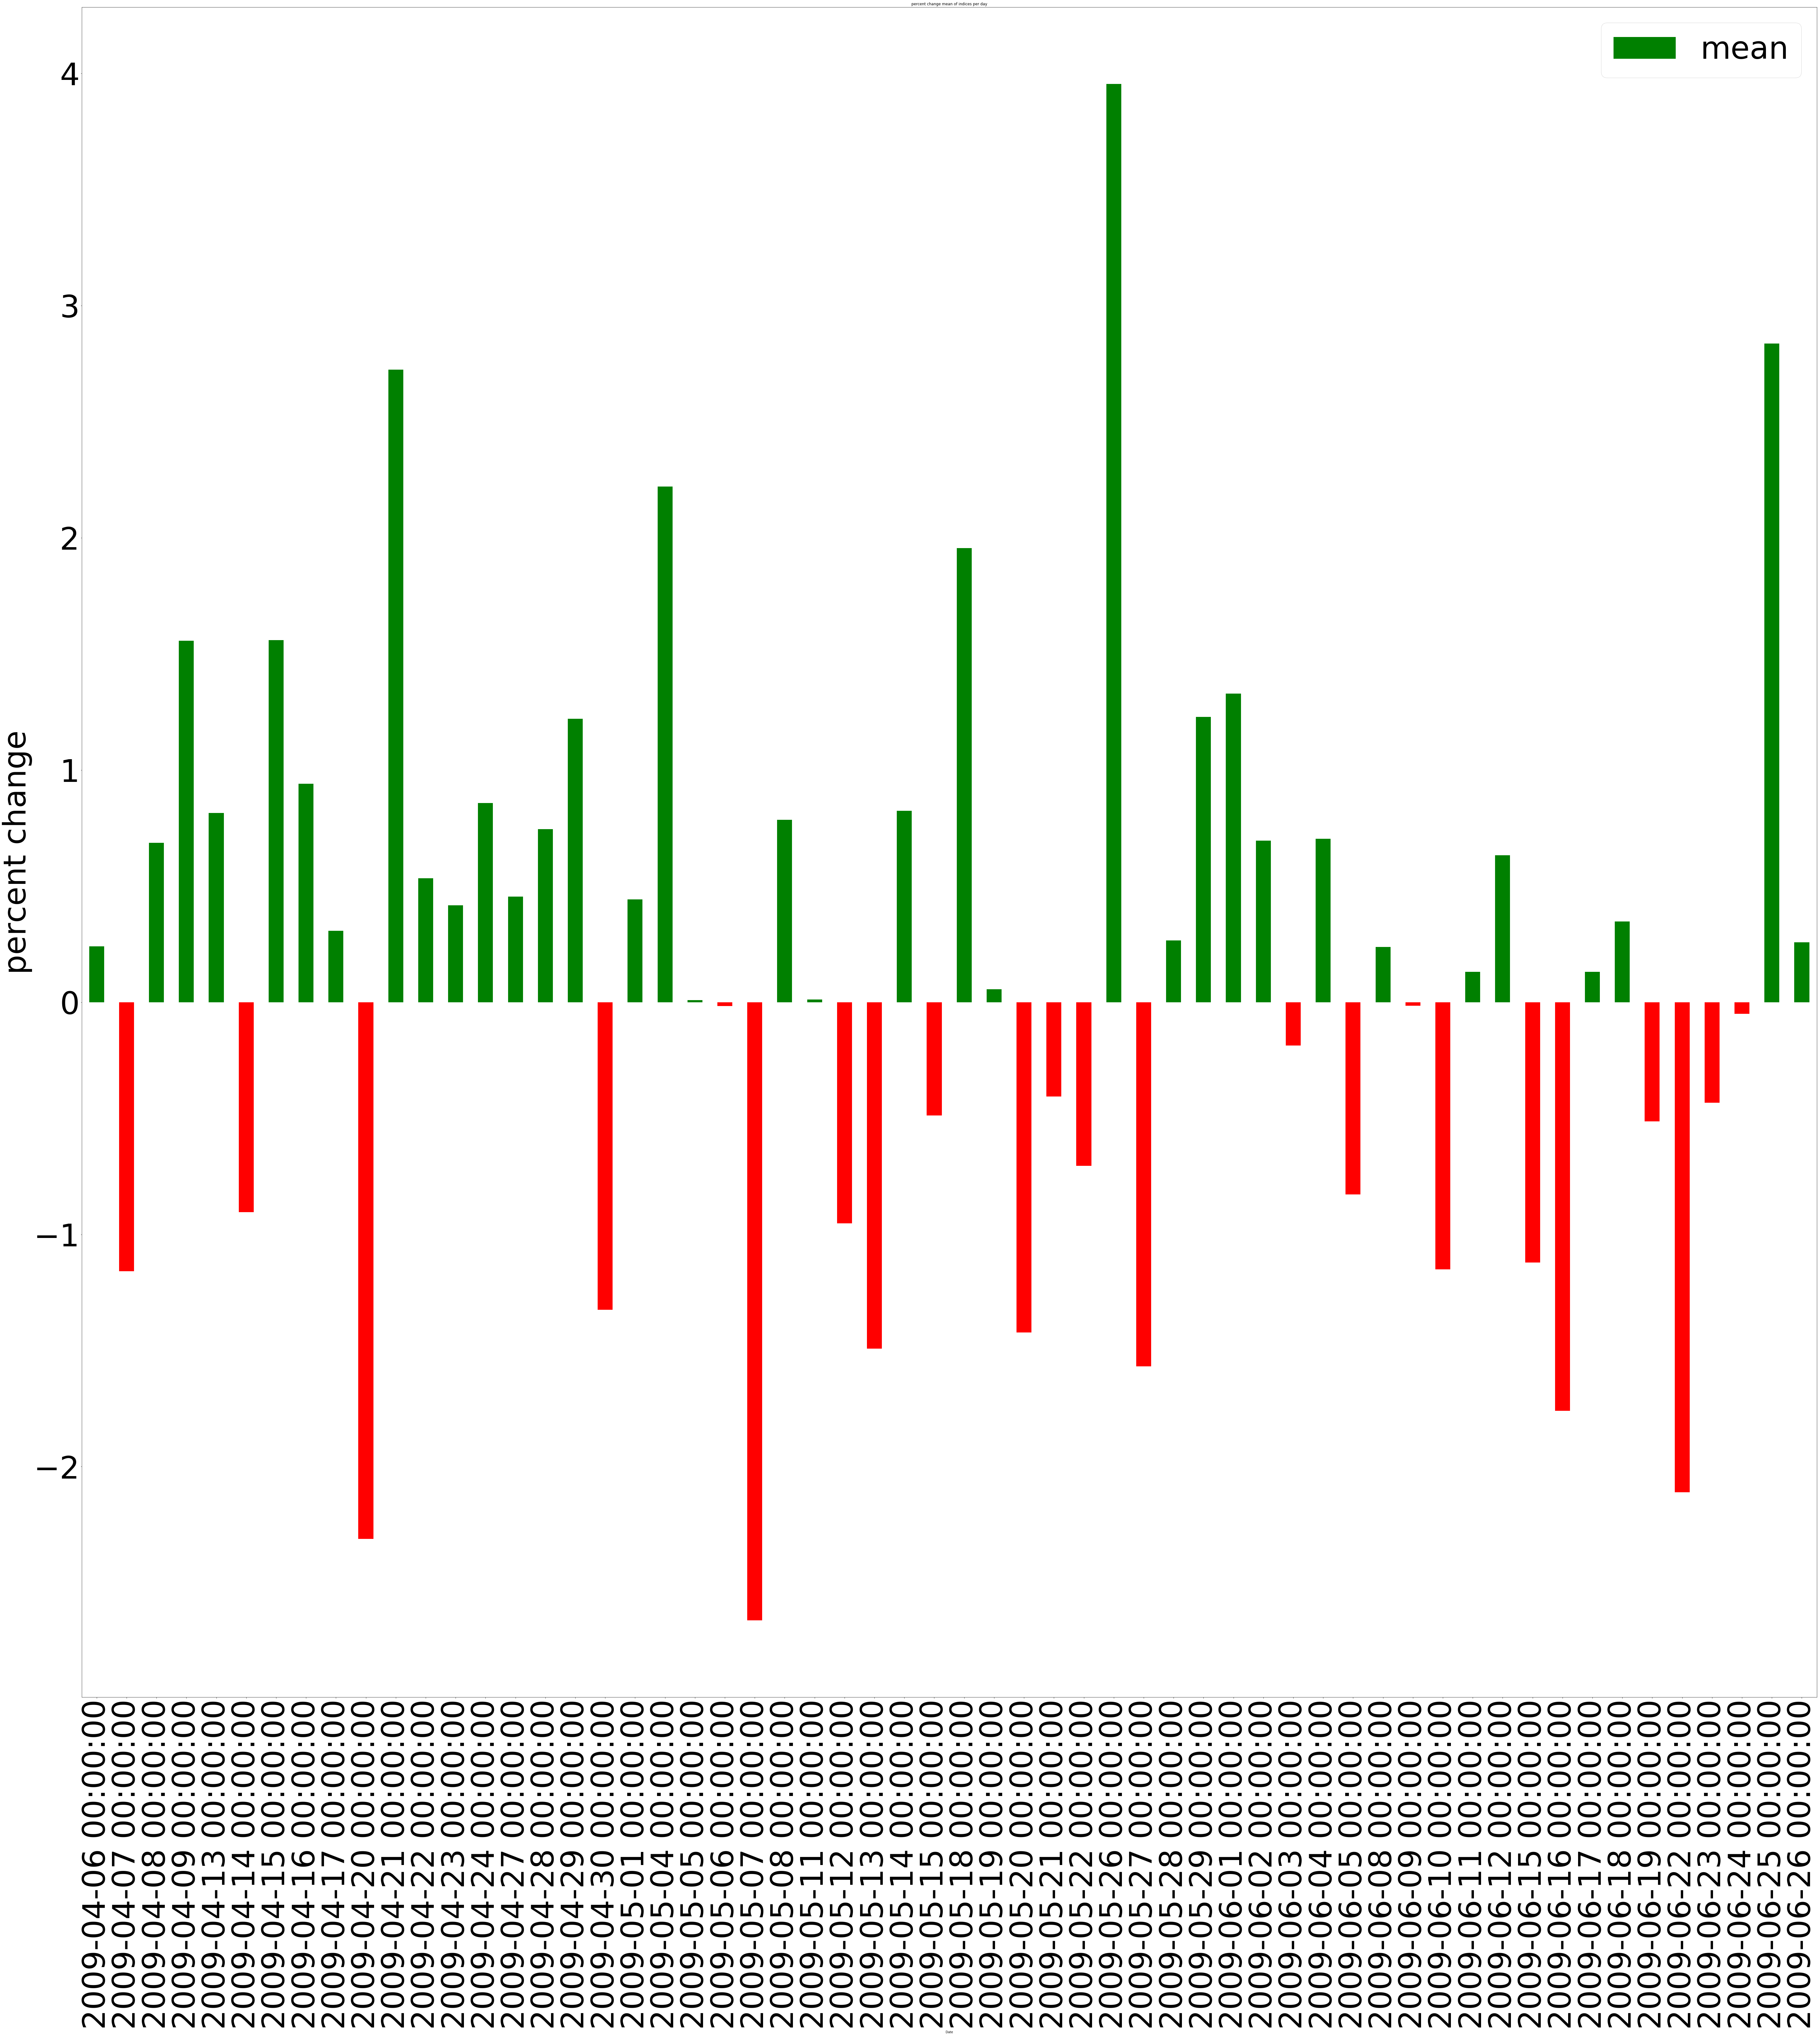

In [79]:
data = percent_change.copy()
data['positive'] = data['mean'] > 0

ax = data['mean'].plot(kind='bar', color=data.positive.map({True: 'g', False: 'r'}),figsize=(100,100),fontsize=100, title="percent change mean of indices per day")
ax.set_ylabel("percent change",size=100)
ax.legend(prop={'size': 100})

In [81]:
to_write = data[['mean','positive']]
to_write.to_csv('mean_finance.csv')

In [8]:
# from feb 13th - 11th
# Trump tweets by day 
# attempt to analyze
tweets = [
    ["Today, it was my great honor to address the @MjrCitiesChiefs Association and @MCSheriffs Conference in Washington, D.C. We will never forget your service, and we will never, ever let you down! We love you, and we thank God for you each and every day. https://t.co/9tuNcVcBqe",
    "The Gallup Poll just announced that 69% of our great citizens expect their finances to improve next year, a 16 year high. Nice!",
    "The Senate Intelligence Committee: THERE IS NO EVIDENCE OF COLLUSION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA!"],
    ["Beautiful evening in El Paso, Texas last night. God Bless the USA! https://t.co/trqA75KxLN"],
    ["Coal is an important part of our electricity generation mix and @TVAnews should give serious consideration to all factors before voting to close viable power plants, like Paradise #3 in Kentucky!",
     "۴۰ سال فساد. ۴۰ سال سرکوب. ۴۰ سال ترور. رژیم ایران فقط موجب #چهل_سال_شکست شده است. مردم ایران که مدتهاست در رنجند شایسته آینده روشن تری هستند",
    "40 years of corruption. 40 years of repression. 40 years of terror. The regime in Iran has produced only #40YearsofFailure. The long-suffering Iranian people deserve a much brighter future."],
    ["https://t.co/LpR2JkYLcW",
    "Will be heading to El Paso very soon. Big speech on Border Security and much else tonight. Tremendous crowd! See you later!",
    "The Democrats are so self righteous and ANGRY! Loosen up and have some fun. The Country is doing well!",
    "The Democrats do not want us to detain, or send back, criminal aliens! This is a brand new demand. Crazy!",
    "No president ever worked harder than me (cleaning up the mess I inherited)!",
    "“Fact checkers have become Fake News.” @JesseBWatters So True!"]
]


In [12]:
# look at # of positions
# plan to see for a correlation on 
from collections import Counter
from pprint import pprint as p
# get count by day
for day in tweets:
    for tweet in day:
        tweet = tweet.split(' ')
        c = Counter(tweet)
        p(c)


Counter({'and': 4,
         'We': 2,
         'will': 2,
         'we': 2,
         'you': 2,
         'Today,': 1,
         'it': 1,
         'was': 1,
         'my': 1,
         'great': 1,
         'honor': 1,
         'to': 1,
         'address': 1,
         'the': 1,
         '@MjrCitiesChiefs': 1,
         'Association': 1,
         '@MCSheriffs': 1,
         'Conference': 1,
         'in': 1,
         'Washington,': 1,
         'D.C.': 1,
         'never': 1,
         'forget': 1,
         'your': 1,
         'service,': 1,
         'never,': 1,
         'ever': 1,
         'let': 1,
         'down!': 1,
         'love': 1,
         'you,': 1,
         'thank': 1,
         'God': 1,
         'for': 1,
         'each': 1,
         'every': 1,
         'day.': 1,
         'https://t.co/9tuNcVcBqe': 1})
Counter({'The': 1,
         'Gallup': 1,
         'Poll': 1,
         'just': 1,
         'announced': 1,
         'that': 1,
         '69%': 1,
         'of': 1,
         'our': 1,

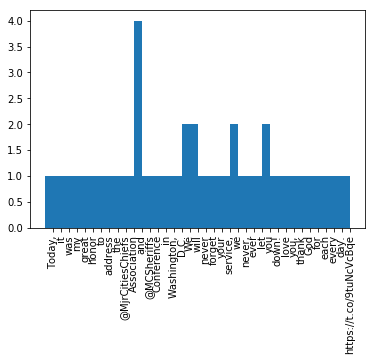

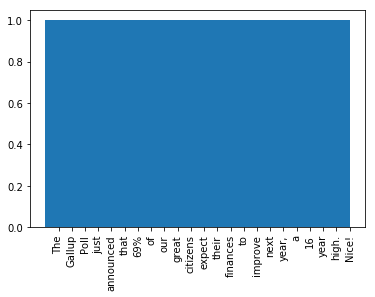

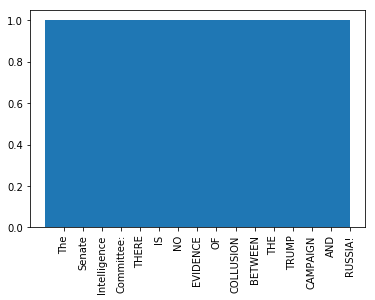

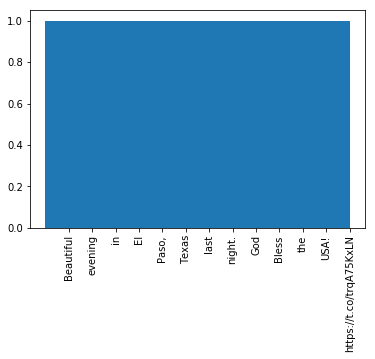

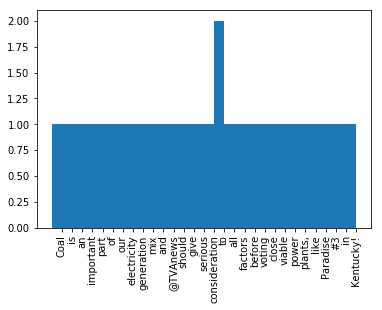

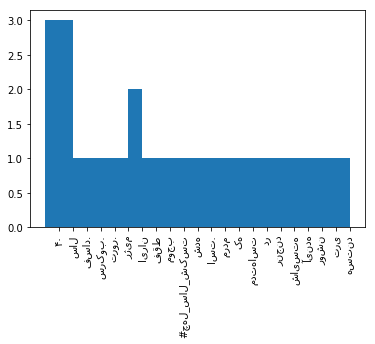

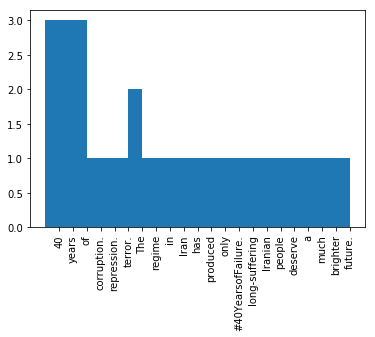

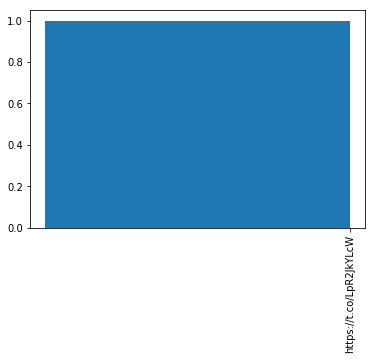

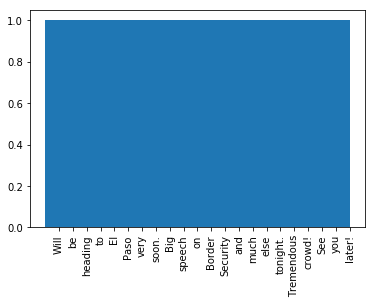

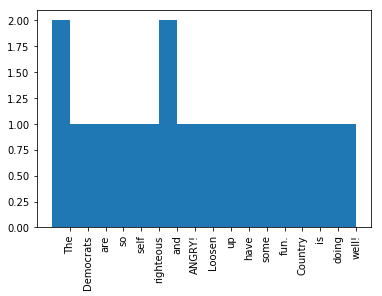

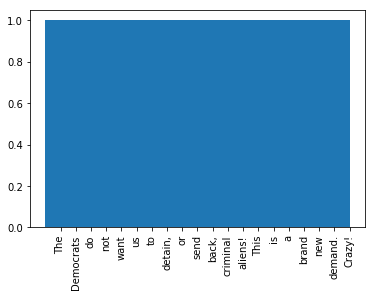

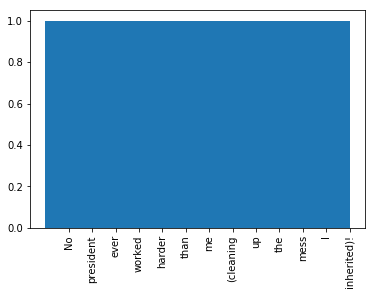

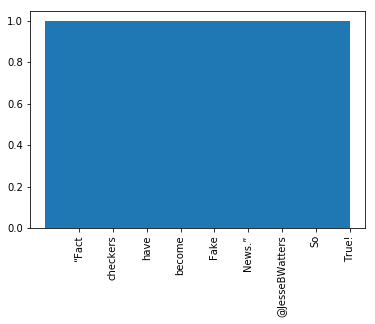

In [20]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


for day in tweets:
    for tweet in day:
        tweet = tweet.split(' ')
        labels, values = zip(*Counter(tweet).items())
        indexes = np.arange(len(labels))
        width = 1
        plt.bar(indexes, values, width)
        plt.xticks(indexes + width * 0.5, labels,rotation=90)
        plt.show()
